# [Machine Learning] K-Means Clustering


### Student ID : 20144367, Name : Lee, Donghyun


## 1. Problem

[K-means algorithm on color image]

Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.

1. Select any color image that consists of distinctive regions with different colors.
2. Apply K-means algorithm to the given image with at least 4 different choice of $K$.
3. For each $K$, plot the energy curve and the result image.

[Visualisation]

1. Input color image
2. Energy curve for each $K$
3. Output image for each $K$

[Output Image]

g(x) = m_c where label(x) = c

Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

## 2. Definition

### 2.1. K-Means Clustering

> k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

> Given a set of observations ${(x_1,x_2, \dots, x_n)}$, where each observation is a $d$-dmensional real vcector, k-means clustering aim to partition the $n$ obseravations into $k( \leq n)$ sets $C={\{C_1, C_2,\dots,C_k\}}$ so as to minimize the within-cluster sum of squares $(WCSS)$. Formally, the oct is to find : 
$$arg\;min \sum_{i=1}^k \sum_{x \in C_i} {\Vert x - \mu_i \Vert}^2 $$
where $\mu_i$ is the mean of points in $C$.

### 2.2. Energy Function and Accuracy

#### [Energy Function]

> $ \frac{1}{N}\sum_{k = 1}^K \| x_i - c_{k_i} \|^2 $
where $k_i$ denotes the category of $x_i$, $N$ denotes total elements,and $c_{k_i}$ denotes the centroid of category $x_i$.

### Codes

#### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from PIL import Image

#### Function L2Distance : Calculate L2 distance between two list

In [2]:
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    
    sqrSum = np.sum(sqrSumList)  
    result = np.sqrt(sqrSum)     
    return(result)

#### Function LoadImage : Load image and return it in list form[(R,G,B)]

In [3]:
def LoadImage(imageInput, row_size, col_size) :

    rawImage = Image.open(imageInput)

    (row_size,col_size) = rawImage.size    
    imageTypeConversion = rawImage.convert("RGB")
    list_PixelsRGB = list(imageTypeConversion.getdata())
    #print("Image loaded successfully.")
    return list_PixelsRGB, row_size, col_size

#### Function InitialClusterSetup : Randomly group the pixels in K groups

In [4]:
def InitialClusterSetup(list_PixelsRGB,row_size, col_size, k) :
    list_clusterLabel = np.zeros(int(row_size * col_size), dtype = int)

    for i in range(row_size * col_size) :
        list_clusterLabel[i] = np.random.randint(0,k)
    
    #print("Cluster Initialization has been completed.")
    return list_clusterLabel

#### Function centroidCalculation : Determine centroid vector with average vectors in cluster k

In [5]:
def CentroidCalculation(list_clusterLabel, list_PixelsRGB, data_size, k) :

    list_centroidVector = np.zeros((k, 3), dtype = float)
    list_centroidVectorSize = np.zeros(k, dtype = int)

    for i in range(0, data_size) :
        list_centroidVector[list_clusterLabel[i]] += list_PixelsRGB[i]
        list_centroidVectorSize[list_clusterLabel[i]] += 1
    
    for i in range(0, k) :
        if list_centroidVectorSize[i] == 0 :
            #list_centroidVector[i] = -99999
            continue
        list_centroidVector[i] /= list_centroidVectorSize[i]
    #print("Centroid Calculation has been completed with average of new clusters' centroid vector.")
    return list_centroidVector

#### Function clusterRebuild : Reconstruct clusters by calculating L2 norms between each vector in cluster and centroid vector

In [6]:
def ClusterRebuild(list_PixelsRGB, list_centroidVector, data_size, k) :

    list_distance = np.zeros(k, dtype = float)
    list_energy = np.zeros(k, dtype = float)
    list_newClusterLabel = np.zeros(data_size, dtype = int)

    for i in range(0, data_size) :
        for j in range(0, k) :
            list_distance[j] = L2Distance(list_centroidVector[j], list_PixelsRGB[i])
        new_label = np.argmin(list_distance)
        list_energy[new_label] += list_distance[new_label]
        list_newClusterLabel[i] = new_label

    #print("Cluster reconstruction completed. New label has been chosen.")
    return list_newClusterLabel, list_energy

#### Function calculateEnergy : Calculate energy using distance list

In [7]:
def CalculateEnergy(list_distance, data_size) :
    #print("Energy calculation completed.")
    return (np.sum(list_distance))

#### Function k_coloredImage : Return the List[(R,G,B)] colored with centorid vector of each cluster

In [8]:
def K_coloredImage(list_clusterLabel, list_centroidVector, data_size, k) :
    imageLabeled = np.zeros((int(data_size), 3), dtype = float)
    clusterSize = np.zeros(k, dtype = int)

    for i in range(0, data_size) :
        imageLabeled[i] = list_centroidVector[list_clusterLabel[i]]
        clusterSize[list_clusterLabel[i]] += 1
    #print("Image has been colored with", k,"colors")
    return imageLabeled

#### Plot Energy Curve

In [9]:
def PlotEnergyCurve(list_energy, k) :
    title = 'Energy per Optimization Iteration when K = ' + str(k)
    plt.xlabel('iteration')
    plt.ylabel('energy')
    plt.title(title)
    plt.plot(list_energy)
    plt.show()

#### Function k_mean_clustering : Process K-mean clustering and display k-colored image

In [12]:
def K_mean_clustering(imageInput, k, maximum_round, threshold) :
    
    row_size = 0
    col_size = 0
#    list_centroidVector = np.zeros((k, 3), dtype = float)
#    list_centroidVectorSize = np.zeros(k, dtype = int)
    list_distance = np.zeros(k, dtype = float)
    list_energy = []
    prevEnergy = 0
    currentEnergy = 0

    list_PixelsRGB, row_size, col_size = LoadImage(imageInput,row_size, col_size)
    data_size = row_size * col_size

    list_clusterLabel = InitialClusterSetup(list_PixelsRGB, row_size, col_size, k)

    for i in range(maximum_round) :
        #print("[ Round",i+1, "]")
        list_centroidVector = CentroidCalculation(list_clusterLabel, list_PixelsRGB, data_size, k)
        list_clusterLabel, list_distance = ClusterRebuild(list_PixelsRGB, list_centroidVector, data_size, k)
        currentEnergy = CalculateEnergy(list_distance, data_size)
#        print(currentEnergy)

        if np.absolute(currentEnergy - prevEnergy) / currentEnergy < threshold :
            break

        list_energy.append(currentEnergy)
        #print("Energy Change Rate : ", np.absolute(currentEnergy - prevEnergy) / currentEnergy)
        prevEnergy = currentEnergy
        currentEnergy = 0

    imageLabeled = K_coloredImage(list_clusterLabel, list_centroidVector, data_size, k)
    
    result = np.zeros((data_size,3),dtype = int)
    newImage = []
    
    for i in range(0, data_size) :
        for j in range(0, 3) :
            result[i][j] = int(imageLabeled[i][j])

    for i in range(0, data_size) :
        newImage.append(tuple(result[i]))
    
    resultImage = Image.new("RGB", (row_size, col_size))
    resultImage.putdata(newImage)
    
    display(resultImage)
    
    PlotEnergyCurve(list_energy, k)

#### Input variables for k-mean clustering

##### (1) K = 5

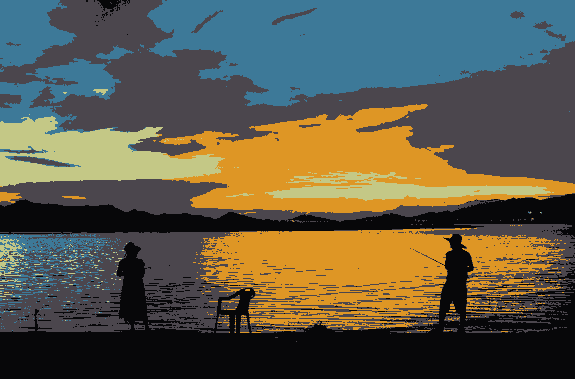

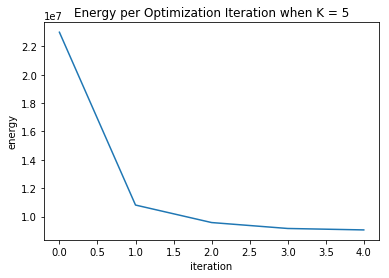

In [13]:
imageInput = 'sunset.jpg'
k = 5
maximum_round = 30
threshold = 0.005

K_mean_clustering(imageInput, k, maximum_round, threshold)

#### (4) K = 10

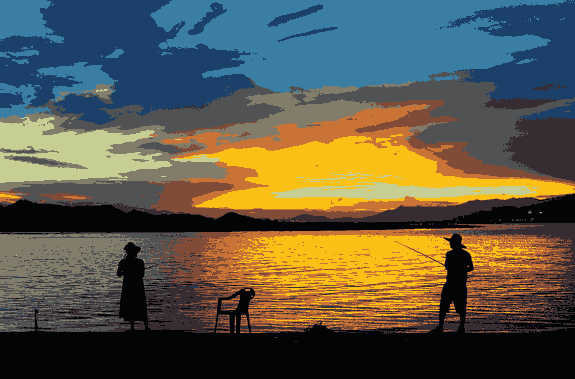

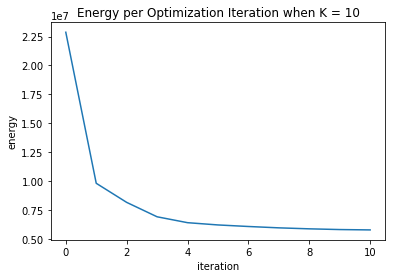

In [14]:
imageInput = 'sunset.jpg'
k = 10
maximum_round = 30
threshold = 0.005
K_mean_clustering(imageInput, k, maximum_round, threshold)

##### (2) K = 15

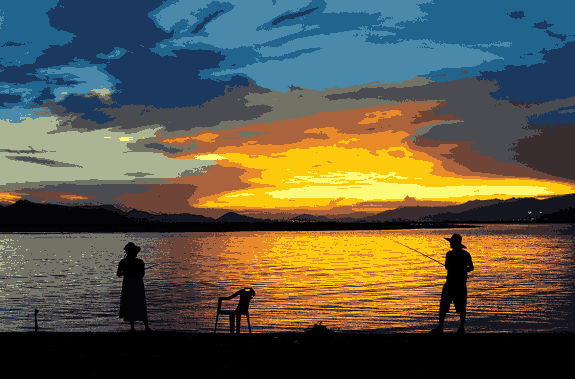

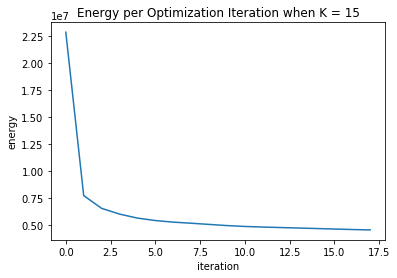

In [16]:
imageInput = 'sunset.jpg'
k = 15
maximum_round = 30
threshold = 0.005
K_mean_clustering(imageInput, k, maximum_round, threshold)

#### (3) K = 30

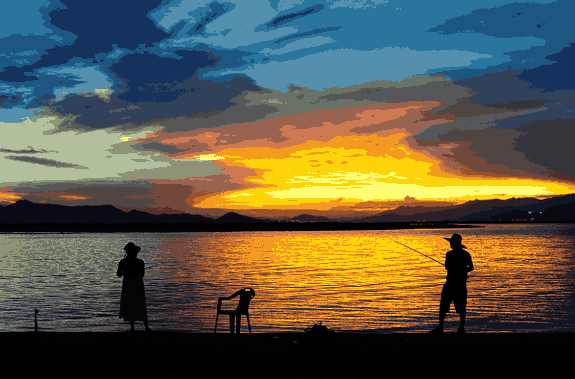

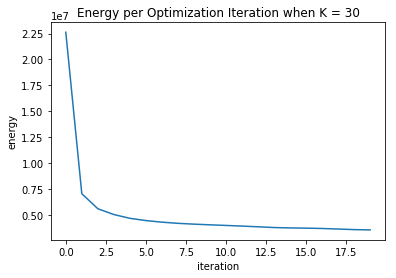

In [17]:
imageInput = 'sunset.jpg'
k = 30
maximum_round = 30
threshold = 0.005
K_mean_clustering(imageInput, k, maximum_round, threshold)